In [7]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

In [9]:
path = str(os.getcwd()) + '\\classifiers\\'
list = os.listdir(path)
shutil.rmtree(path+'2024-06-25_18-47-37\\')
os.listdir(path)
print(list)

['2024-06-25_18-47-37', '2024-06-25_18-49-29', '2024-06-26_12-51-45', '2024-06-26_13-44-52', '2024-06-26_16-03-32', '2024-06-26_18-34-16', '2024-06-26_18-34-59', '2024-06-26_18-36-23', '2024-06-26_18-37-40', '2024-06-26_18-39-29', '2024-06-26_18-40-51', '2024-06-26_18-41-50', '2024-06-26_18-59-52', '2024-06-26_19-00-37', '2024-06-26_19-01-05', 'general_metadata.json']


In [3]:
prefix = "dataframes/3Dclass_"
sep = '_'
sufix = ".csv"

errws = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
sizes = [50, 100, 200, 300, 400, 500, 600, 700]
fields = ['avs','sigmas','evars','rerrs']
trange = np.arange(0,200,1)

In [3]:
def extract_by_errw(size, field):
    data_by_errw = dict()
    for errw in errws:
        df = pd.read_csv(prefix + str(size) + sep + str(errw) + sufix)
        data_by_errw[errw] = df[field].tolist()
    return data_by_errw

def extract_by_size(errw, field):
    data_by_size = dict()
    for size in sizes:
        df = pd.read_csv(prefix + str(size) + sep + str(errw) + sufix)
        data_by_size[size] = df[field].tolist()
    return data_by_size

def plot_data(errw,size,field):
    fig, ax = plt.subplots()
    if errw == None:
        to_plot = extract_by_errw(size,field)    
        for errw in errws:
            ax.plot(trange,to_plot[errw],label=str(errw))
            ax.legend()
        plt.plot()
    elif size == None:
        to_plot = extract_by_size(errw,field)    
        for size in sizes:
            ax.plot(trange,to_plot[size],label=str(size))
            ax.legend()
        plt.plot()
    else:
        to_plot = extract_by_errw(size,field)
        ax.plot(trange,to_plot[errw],label=str(errw))
        ax.legend()
        plt.plot()

def log_plot_data(errw,size,field):
    fig, ax = plt.subplots()
    if errw == None:
        to_plot = extract_by_errw(size,field)    
        for errw in errws:
            ax.plot(np.log(trange),np.log(np.array(to_plot[errw])),label=str(errw))
            ax.legend()
        plt.plot()
    elif size == None:
        to_plot = extract_by_size(errw,field)    
        for size in sizes:
            ax.plot(np.log(trange),np.log(np.array(to_plot[size])),label=str(size))
            ax.legend()
        plt.plot()
    else:
        to_plot = extract_by_errw(size,field)
        ax.plot(np.log(trange),np.log(np.array(to_plot[errw])),label=str(errw))
        ax.legend()
        plt.plot()

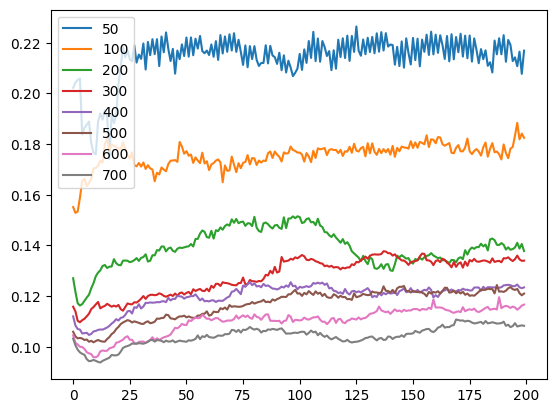

In [36]:
plot_data(0,None,'avs')

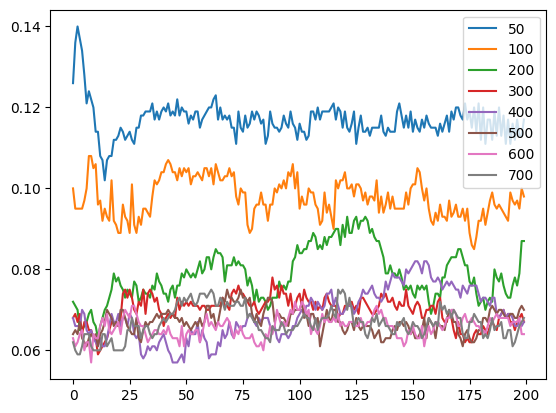

In [35]:
plot_data(0.5,None,'rerrs')


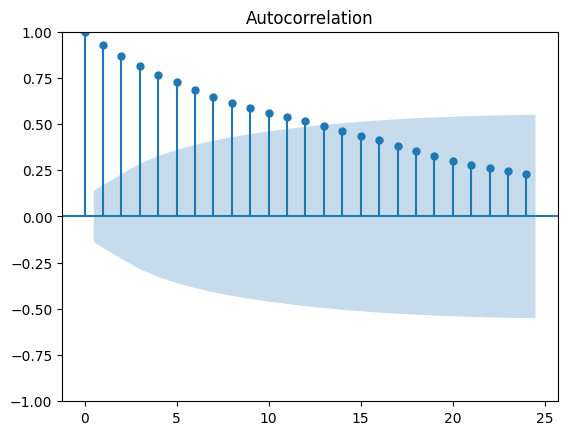

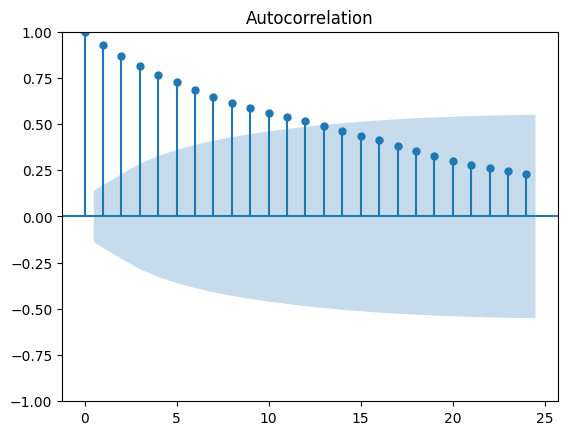

In [77]:
plot_acf(np.array(data))